### Bharat Dadwaria (1941000147)
### Stochastic Modeling and Application
### Assignment 6: Choose any ONE of the queue models M/M/1, M/M/4, M/M/1/K and do EITHER of the following tasks:
Write a program to simulate
* a) A Poisson arrival process and exponential serving time
* b) Calculate each of the probability distributions given in Chapter 7
* c) Compare with your values as n,t->infinity

In [60]:
import matplotlib.pyplot as plt
import numpy as np

In [69]:
#inter-arrival time
def int_arr(n,arr_rate):
    inter_arr_time=[]
    for i in range(n):
        temp = int(np.random.exponential(1/arr_rate)*60*60)
        if i==0:
            inter_arr_time.append(0)
        else:
            inter_arr_time.append(temp)
    return inter_arr_time

In [75]:
#arrival time
def arr_time(n,inter_arr_time):
    arr_time=[]
    for i in range(n):
        if i==0:
            arr_time.append(0)
        else:
            arr_time.append(arr_time[i-1]+inter_arr_time[i])
    return arr_time

In [71]:
def ser_time(n,ser_rate):
    ser_time=[]
    while not len(ser_time) == n:
        t = int(np.random.exponential(1/ser_rate)*60*60)
        if not t<1:
            ser_time.append(t)
    return ser_time

In [72]:
def statistics(n,ser_time,arr_rate):
    Lembda=arr_rate/ser_rate
    pi=[]
    for j in range (n):
        p=(1-Lembda)*(Lembda**j)
        pi.append(p)
    
    L_s=Lembda/(1-Lembda)
    L_q=L_s-Lembda
    W_s=L_s/arr_rate
    W_q = W_s - (1/ser_rate)
    
    return pi,L_s,L_q,W_s,W_q

In [77]:
total_time=int(input("Please enter total amount of time in hours:"))
arrival_rate=int(input("Please enter arrival amount in hours:"))
service_rate=int(input("Please enter Service rate in hours: "))

Please enter total amount of time in hours:25
Please enter arrival amount in hours:5
Please enter Service rate in hours: 9


In [78]:
n=int((np.random.poisson(arrival_rate))*total_time)

In [79]:
inter_arrival_time=int_arr(n,arrival_rate)
arrival_time=arr_time(n,inter_arrival_time)
service_time=ser_time(n,service_rate)

In [81]:
#taking values 
pi,L_s,L_q,W_s,W_q=statistics(n,service_time,arrival_rate)

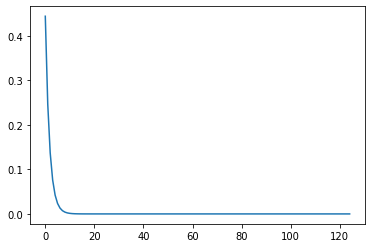

In [82]:
plt.plot(pi)

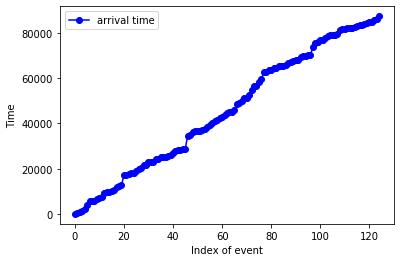

In [84]:
fig = plt.figure()
#fig.suptitle('Times between consecutive events in a simulated Poisson process')
plot, = plt.plot([i for i in range(n)], arrival_time, 'bo-', label='arrival time')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()

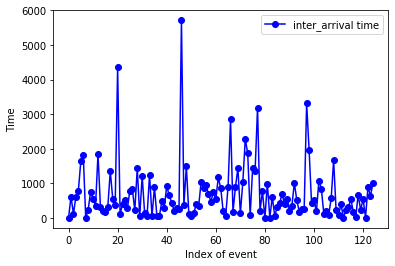

In [86]:
fig = plt.figure()
#fig.suptitle('Times between consecutive events in a simulated Poisson process')
plot, = plt.plot([i for i in range(n)], inter_arrival_time, 'bo-', label='inter_arrival time')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()

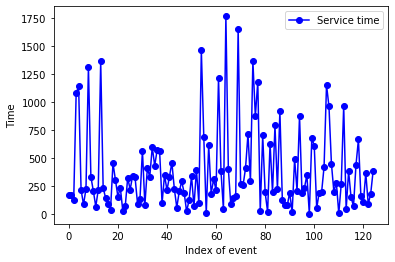

In [89]:
#fig.suptitle('Times between consecutive events in a simulated Poisson process')
plot, = plt.plot([i for i in range(n)], service_time, 'bo-', label='Service time')
plt.legend(handles=[plot])
plt.xlabel('Index of event')
plt.ylabel('Time')
plt.show()